# Regressão 01 - tarefa 03 - transformações em X e Y

Carregue os pacotes necessários e a base de gorjetas.

### I. Modelo no valor da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo em ```tip```, explicada por ```sex, smoker, diner e net_bill```.  
2. Remova as variáveis não significantes.  
3. observe o gráfico de resíduos em função de ```net_bill```  
4. teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.

In [1]:
import pandas as pd
import numpy as np
from seaborn import load_dataset

import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
tips = sns.load_dataset("tips")
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


In [3]:
import seaborn as sns
import pandas as pd
import numpy as np
import patsy
import statsmodels.api as sm

# Carregar a base de dados 'tips'
tips = sns.load_dataset("tips")

# Criar a variável 'net_bill'
tips['net_bill'] = tips['total_bill'] - tips['tip']

# Criar a matriz de design (X) e a matriz de resposta (y) utilizando Patsy
y, X = patsy.dmatrices('tip ~ sex + smoker + time + net_bill', data=tips)

# Converter X para um DataFrame do pandas
X_df = pd.DataFrame(X, columns=X.design_info.column_names)

# Ajustar o modelo de regressão linear
model = sm.OLS(y, X_df).fit()

# Obter variáveis significativas (p-value < 0.05)
significant_vars = model.pvalues[model.pvalues < 0.05].index

# Filtrar X_df para manter apenas variáveis significativas
X_significant_df = X_df[significant_vars]

# Exibir as variáveis significativas
significant_vars


Index(['Intercept', 'net_bill'], dtype='object')

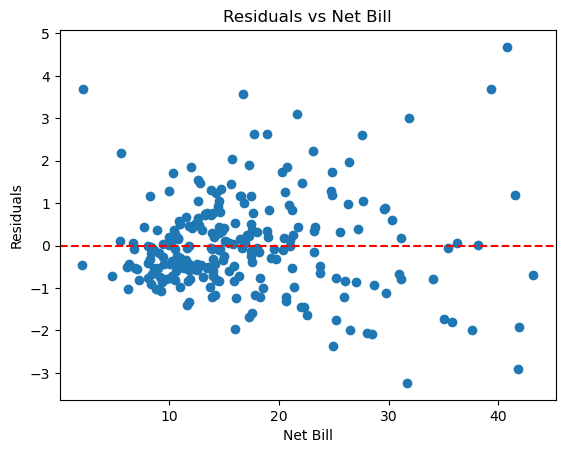

{'Original': 760.2663178186956, 'Log Transformed': 774.436325755411, 'Polynomial Transformed': 770.9185283002569}


In [4]:
# 1. Plotar o Gráfico de Resíduos em Função de net_bill
plt.scatter(tips['net_bill'], model.resid)
plt.xlabel('Net Bill')
plt.ylabel('Residuals')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals vs Net Bill')
plt.show()

# 2. Testar Transformações de net_bill
# Logaritmo de net_bill
tips['log_net_bill'] = np.log(tips['net_bill'])
y_log, X_log = patsy.dmatrices('tip ~ sex + smoker + time + log_net_bill', data=tips)
model_log = sm.OLS(y_log, X_log).fit()

# Polinômio de net_bill (quadrado)
tips['net_bill_squared'] = tips['net_bill'] ** 2
y_poly, X_poly = patsy.dmatrices('tip ~ sex + smoker + time + net_bill_squared', data=tips)
model_poly = sm.OLS(y_poly, X_poly).fit()

# 3. Escolher o Melhor Modelo
# Comparando os modelos pelo AIC
aic_values = {
    'Original': model.aic,
    'Log Transformed': model_log.aic,
    'Polynomial Transformed': model_poly.aic
}

# Exibindo os valores de AIC
print(aic_values)



In [5]:
import seaborn as sns
import numpy as np
import patsy
import statsmodels.api as sm

# Carregando a base de dados 'tips'
tips = sns.load_dataset("tips")

# Criando a variável 'net_bill'
tips['net_bill'] = tips['total_bill'] - tips['tip']

# Aplicando a transformação logarítmica a net_bill
tips['log_net_bill'] = np.log(tips['net_bill'])

# Criando a variável polinomial (quadrado de net_bill)
tips['net_bill_squared'] = tips['net_bill'] ** 2

# Ajustando modelos para as transformações
# Modelo com log de net_bill
y_log, X_log = patsy.dmatrices('tip ~ sex + smoker + time + log_net_bill', data=tips)
model_log = sm.OLS(y_log, X_log).fit()

# Modelo com net_bill ao quadrado
y_poly, X_poly = patsy.dmatrices('tip ~ sex + smoker + time + net_bill_squared', data=tips)
model_poly = sm.OLS(y_poly, X_poly).fit()

model_log.summary(), model_poly.summary()


(<class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:                    tip   R-squared:                       0.296
 Model:                            OLS   Adj. R-squared:                  0.284
 Method:                 Least Squares   F-statistic:                     25.06
 Date:                Sun, 26 Nov 2023   Prob (F-statistic):           2.41e-17
 Time:                        09:51:44   Log-Likelihood:                -382.22
 No. Observations:                 244   AIC:                             774.4
 Df Residuals:                     239   BIC:                             791.9
 Df Model:                           4                                         
 Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
 -----------------------------------------------------------------

In [6]:
import seaborn as sns
import numpy as np
import patsy
import statsmodels.api as sm

# Carregando a base de dados 'tips'
tips = sns.load_dataset("tips")

# Criando a variável 'net_bill'
tips['net_bill'] = tips['total_bill'] - tips['tip']

# Aplicando a transformação logarítmica a net_bill
tips['log_net_bill'] = np.log(tips['net_bill'])

# Criando a variável polinomial (quadrado de net_bill)
tips['net_bill_squared'] = tips['net_bill'] ** 2

# Ajustando modelos para as transformações
# Modelo com log de net_bill
y_log, X_log = patsy.dmatrices('tip ~ sex + smoker + time + log_net_bill', data=tips)
model_log = sm.OLS(y_log, X_log).fit()

# Modelo com net_bill ao quadrado
y_poly, X_poly = patsy.dmatrices('tip ~ sex + smoker + time + net_bill_squared', data=tips)
model_poly = sm.OLS(y_poly, X_poly).fit()

model_log.summary(), model_poly.summary()


(<class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:                    tip   R-squared:                       0.296
 Model:                            OLS   Adj. R-squared:                  0.284
 Method:                 Least Squares   F-statistic:                     25.06
 Date:                Sun, 26 Nov 2023   Prob (F-statistic):           2.41e-17
 Time:                        09:51:44   Log-Likelihood:                -382.22
 No. Observations:                 244   AIC:                             774.4
 Df Residuals:                     239   BIC:                             791.9
 Df Model:                           4                                         
 Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
 -----------------------------------------------------------------

 III. Previsão de renda

Vamos trabalhar a base que você vai usar no projeto do final deste ciclo.

Carregue a base ```previsao_de_renda.csv```.

|variavel|descrição|
|-|-|
|data_ref                | Data de referência de coleta das variáveis |
|index                   | Código de identificação do cliente|
|sexo                    | Sexo do cliente|
|posse_de_veiculo        | Indica se o cliente possui veículo|
|posse_de_imovel         | Indica se o cliente possui imóvel|
|qtd_filhos              | Quantidade de filhos do cliente|
|tipo_renda              | Tipo de renda do cliente|
|educacao                | Grau de instrução do cliente|
|estado_civil            | Estado civil do cliente|
|tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)|
|idade                   | Idade do cliente|
|tempo_emprego           | Tempo no emprego atual|
|qt_pessoas_residencia   | Quantidade de pessoas que moram na residência|
|renda                   | Renda em reais|

1. Ajuste um modelo de regressão linear simples para explicar ```renda``` como variável resposta, por ```tempo_emprego``` como variável explicativa. Observe que há muitas observações nessa tabela. Utilize os recursos que achar necessário.
2. Faça uma análise de resíduos. Com os recursos vistos neste módulo, como você melhoraria esta regressão?
3. Ajuste um modelo de regressão linear múltipla para explicar ```renda``` (ou uma transformação de ```renda```) de acordo com as demais variáveis.
4. Remova as variáveis não significantes e ajuste novamente o modelo. Interprete os parâmetros
5. Faça uma análise de resíduos. Avalie a qualidade do ajuste.

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Carregando os dados
df = pd.read_csv('previsao_de_renda.csv')


In [76]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [77]:
# Imprimindo as colunas do DataFrame
print("Colunas disponíveis no DataFrame: ", df.columns)

# Verificando se as colunas específicas estão presentes
if 'tempo_emprego' in df.columns and 'renda' in df.columns:
    print("As colunas 'tempo_emprego' e 'renda' estão presentes no DataFrame.")
else:
    print("Verifique se as colunas 'tempo_emprego' e/ou 'renda' estão faltando.")


Colunas disponíveis no DataFrame:  Index(['Unnamed: 0', 'data_ref', 'id_cliente', 'sexo', 'posse_de_veiculo',
       'posse_de_imovel', 'qtd_filhos', 'tipo_renda', 'educacao',
       'estado_civil', 'tipo_residencia', 'idade', 'tempo_emprego',
       'qt_pessoas_residencia', 'renda'],
      dtype='object')
As colunas 'tempo_emprego' e 'renda' estão presentes no DataFrame.


In [12]:
# Definindo a variável resposta e a variável explicativa
X = df['tempo_emprego']  # Variável explicativa
y = df['renda']          # Variável resposta

In [14]:
# Adicionando uma constante ao modelo (intercepto)
X = sm.add_constant(X)


In [16]:
# Verificando valores ausentes
print("Valores ausentes em 'tempo_emprego':", df['tempo_emprego'].isna().sum())
print("Valores ausentes em 'renda':", df['renda'].isna().sum())

# Verificando valores infinitos
print("Valores infinitos em 'tempo_emprego':", np.isinf(df['tempo_emprego']).sum())
print("Valores infinitos em 'renda':", np.isinf(df['renda']).sum())


Valores ausentes em 'tempo_emprego': 2573
Valores ausentes em 'renda': 0
Valores infinitos em 'tempo_emprego': 0
Valores infinitos em 'renda': 0


In [17]:
# Removendo linhas com valores ausentes ou infinitos
df = df.replace([np.inf, -np.inf], np.nan)  # Substituindo infinitos por NaN
df = df.dropna(subset=['tempo_emprego', 'renda'])  # Removendo linhas com NaN

# Redefinindo as variáveis após tratamento
X = df['tempo_emprego']
y = df['renda']
X = sm.add_constant(X)  # Não esqueça de adicionar a constante novamente


In [18]:
# Ajustando o modelo de regressão linear
model = sm.OLS(y, X).fit()


In [19]:
print(model.summary())
# Código para plotar o gráfico, se necessário


                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       0.148
Model:                            OLS   Adj. R-squared:                  0.148
Method:                 Least Squares   F-statistic:                     2162.
Date:                Sun, 26 Nov 2023   Prob (F-statistic):               0.00
Time:                        10:00:42   Log-Likelihood:            -1.2963e+05
No. Observations:               12427   AIC:                         2.593e+05
Df Residuals:                   12425   BIC:                         2.593e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2177.9041    112.212     19.409

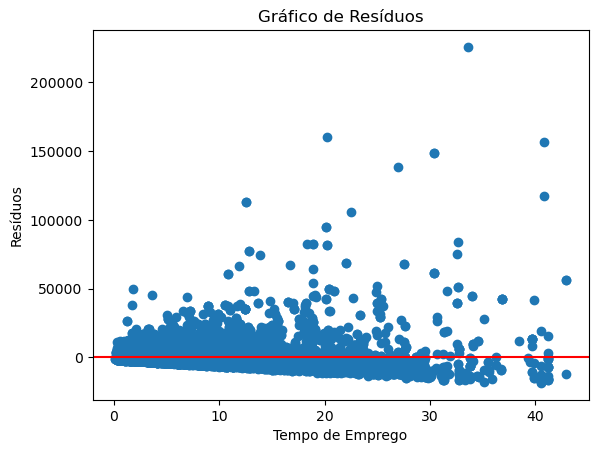

In [20]:
# Calculando resíduos
resíduos = model.resid

# Plotando os resíduos
plt.scatter(X['tempo_emprego'], resíduos)
plt.axhline(y=0, color='r', linestyle='-')
plt.title('Gráfico de Resíduos')
plt.xlabel('Tempo de Emprego')
plt.ylabel('Resíduos')
plt.show()


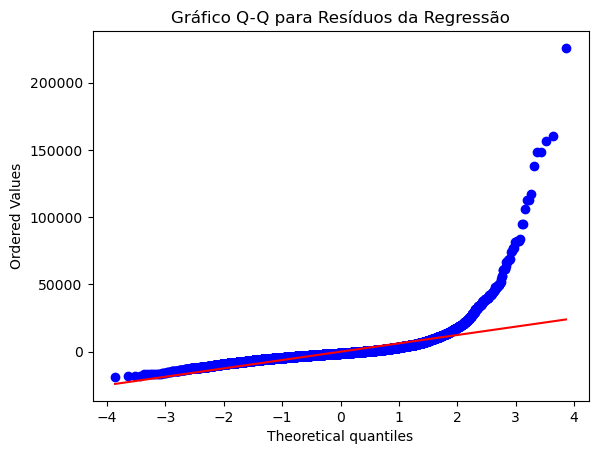

In [21]:
import scipy.stats as stats

# Gráfico Q-Q para resíduos
stats.probplot(resíduos, dist="norm", plot=plt)
plt.title('Gráfico Q-Q para Resíduos da Regressão')
plt.show()


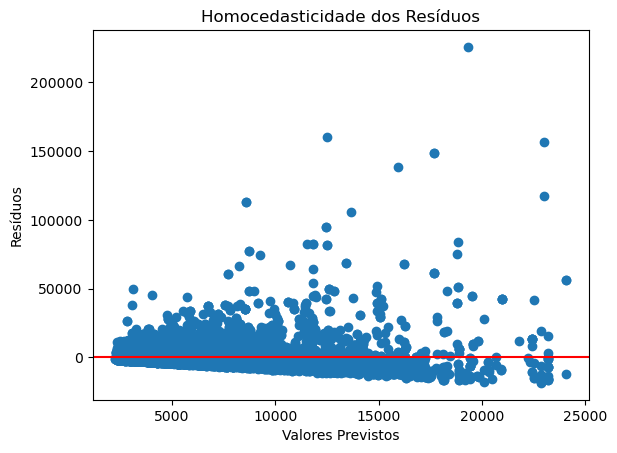

In [22]:
plt.scatter(model.predict(X), resíduos)
plt.axhline(y=0, color='r', linestyle='-')
plt.title('Homocedasticidade dos Resíduos')
plt.xlabel('Valores Previstos')
plt.ylabel('Resíduos')
plt.show()


In [23]:
import numpy as np

# Aplicando a transformação logarítmica
df['log_tempo_emprego'] = np.log(df['tempo_emprego'] + 1)  # Adiciona 1 para evitar log(0)

# Ajustando o modelo com a variável transformada
X_log = sm.add_constant(df['log_tempo_emprego'])
model_log = sm.OLS(y, X_log).fit()
print(model_log.summary())


                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       0.106
Model:                            OLS   Adj. R-squared:                  0.106
Method:                 Least Squares   F-statistic:                     1481.
Date:                Sun, 26 Nov 2023   Prob (F-statistic):          3.42e-306
Time:                        10:06:09   Log-Likelihood:            -1.2993e+05
No. Observations:               12427   AIC:                         2.599e+05
Df Residuals:                   12425   BIC:                         2.599e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -1106.4794    202.27

In [24]:
from scipy import stats

# Calculando a pontuação Z para a variável 'tempo_emprego'
z_scores = np.abs(stats.zscore(df['tempo_emprego']))

# Removendo outliers (por exemplo, z > 3)
df_no_outliers = df[(z_scores < 3)]

# Reajustando o modelo sem outliers
X_no_outliers = sm.add_constant(df_no_outliers['tempo_emprego'])
y_no_outliers = df_no_outliers['renda']
model_no_outliers = sm.OLS(y_no_outliers, X_no_outliers).fit()
print(model_no_outliers.summary())


                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       0.123
Model:                            OLS   Adj. R-squared:                  0.123
Method:                 Least Squares   F-statistic:                     1713.
Date:                Sun, 26 Nov 2023   Prob (F-statistic):               0.00
Time:                        10:06:31   Log-Likelihood:            -1.2555e+05
No. Observations:               12199   AIC:                         2.511e+05
Df Residuals:                   12197   BIC:                         2.511e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2463.1671    103.840     23.721

In [26]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Definindo X_mult com a coluna 'tempo_emprego' e uma constante
X_mult = df[['tempo_emprego']]
X_mult = sm.add_constant(X_mult)

# Calculando VIF
vif_data = pd.DataFrame()
vif_data["feature"] = X_mult.columns
vif_data["VIF"] = [variance_inflation_factor(X_mult.values, i) for i in range(X_mult.shape[1])]

print(vif_data)


         feature       VIF
0          const  2.324241
1  tempo_emprego  1.000000


In [27]:
from sklearn.linear_model import Ridge

# Ajustando um modelo de Ridge
ridge = Ridge(alpha=1.0)
ridge.fit(X, y)

# Você pode variar o valor de alpha para ver diferentes resultados


Ridge()

In [83]:
import pandas as pd

# Carregando os dados
df = pd.read_csv('previsao_de_renda.csv')

# Mostrando as primeiras linhas do DataFrame para entender a estrutura dos dados
print(df.head())



   Unnamed: 0    data_ref  id_cliente sexo  posse_de_veiculo  posse_de_imovel  \
0           0  2015-01-01       15056    F             False             True   
1           1  2015-01-01        9968    M              True             True   
2           2  2015-01-01        4312    F              True             True   
3           3  2015-01-01       10639    F             False             True   
4           4  2015-01-01        7064    M              True            False   

   qtd_filhos        tipo_renda           educacao estado_civil  \
0           0        Empresário         Secundário     Solteiro   
1           0       Assalariado  Superior completo       Casado   
2           0        Empresário  Superior completo       Casado   
3           1  Servidor público  Superior completo       Casado   
4           0       Assalariado         Secundário     Solteiro   

  tipo_residencia  idade  tempo_emprego  qt_pessoas_residencia    renda  
0            Casa     26       6.602

In [85]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Carregar os dados
df = pd.read_csv('previsao_de_renda.csv')

# Substituir valores infinitos por NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Checar a quantidade de NaNs em cada coluna e remover as colunas com muitos NaNs
print("Contagem de NaNs por coluna antes da remoção:")
print(df.isna().sum())

# Removendo colunas com muitos NaNs - ajuste o limiar conforme necessário
limiar_nan = 0.1 * len(df)  # Exemplo: colunas com mais de 10% de NaNs
colunas_para_remover = df.columns[df.isna().sum() > limiar_nan]
df.drop(columns=colunas_para_remover, inplace=True)

# Checar novamente a quantidade de NaNs
print("Contagem de NaNs por coluna após remoção de algumas colunas:")
print(df.isna().sum())

# Removendo linhas com qualquer NaN restante
df.dropna(inplace=True)

# Conversão de variáveis categóricas em dummies
df = pd.get_dummies(df, columns=['sexo', 'tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia'], drop_first=True)

# Definindo a variável dependente e independentes
variavel_dependente = 'renda'
variaveis_independentes = df.columns.drop(['Unnamed: 0', 'data_ref', 'id_cliente', variavel_dependente])

# Ajuste do modelo inicial
X = df[variaveis_independentes]
y = df[variavel_dependente]
X = sm.add_constant(X)  # Adiciona o intercepto
modelo = sm.OLS(y, X.astype(float)).fit()
print(modelo.summary())

# Identificação e remoção de variáveis não significativas
p_valores = modelo.pvalues
variaveis_nao_significativas = p_valores[p_valores > 0.05].index.tolist()
X_ajustado = X.drop(columns=variaveis_nao_significativas)

# Reajuste do modelo
modelo_ajustado = sm.OLS(y, X_ajustado.astype(float)).fit()
print(modelo_ajustado.summary())


Contagem de NaNs por coluna antes da remoção:
Unnamed: 0                  0
data_ref                    0
id_cliente                  0
sexo                        0
posse_de_veiculo            0
posse_de_imovel             0
qtd_filhos                  0
tipo_renda                  0
educacao                    0
estado_civil                0
tipo_residencia             0
idade                       0
tempo_emprego            2573
qt_pessoas_residencia       0
renda                       0
dtype: int64
Contagem de NaNs por coluna após remoção de algumas colunas:
Unnamed: 0               0
data_ref                 0
id_cliente               0
sexo                     0
posse_de_veiculo         0
posse_de_imovel          0
qtd_filhos               0
tipo_renda               0
educacao                 0
estado_civil             0
tipo_residencia          0
idade                    0
qt_pessoas_residencia    0
renda                    0
dtype: int64
                            OLS Regress

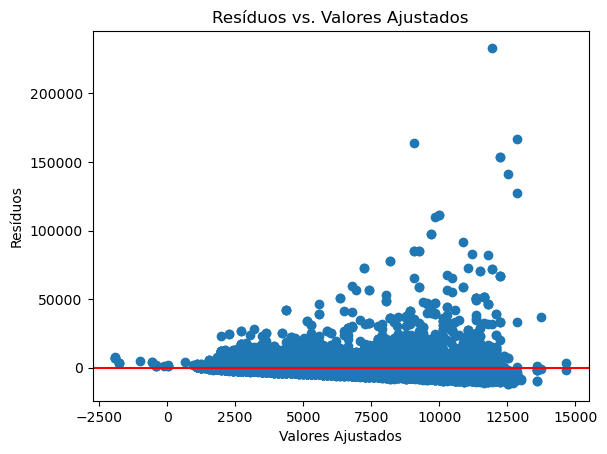

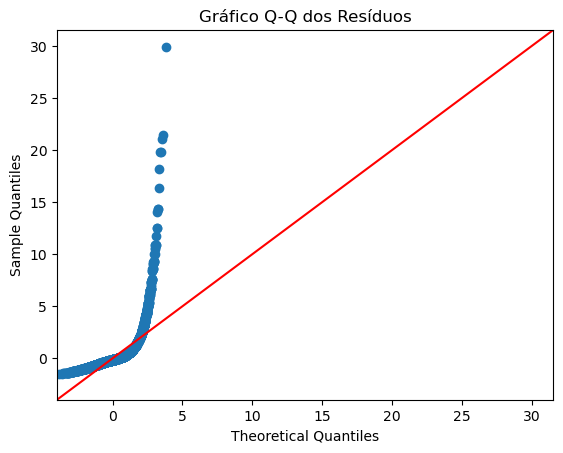

In [87]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats

# Supondo que 'modelo_ajustado' seja o seu modelo de regressão linear ajustado
# Calculando os resíduos
residuos = modelo_ajustado.resid

# Gráfico de Resíduos vs. Valores Ajustados (para Homocedasticidade)
plt.scatter(modelo_ajustado.fittedvalues, residuos)
plt.xlabel('Valores Ajustados')
plt.ylabel('Resíduos')
plt.title('Resíduos vs. Valores Ajustados')
plt.axhline(y=0, color='r', linestyle='-')
plt.show()

# Gráfico Q-Q (para Normalidade dos Resíduos)
fig = sm.qqplot(residuos, line='45', fit=True)
plt.title('Gráfico Q-Q dos Resíduos')
plt.show()
